# Build PyTorch Model to Predict Machine Failure
- Serialize with ONNX

# 1.  Import Libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
from sklearn.preprocessing import OneHotEncoder

project_dir = '/sasinside/userdata/gegrab/resources/hmeq'

# 2.   Read Data

In [30]:
df = pd.read_csv('Data_orig/machine_failure.csv')
#df = df.dropna() # Or some way to treat missing values 

machine = df.drop('FAILURE', axis=1)

 
 
class_inputs   = ['REASON', 'INDUSTRY']
 
target         = ["FAILURE"]
numeric_inputs = ['DAILY_PRODUCTION', 'MONTHLY_PRODUCTION', 'PROD_TARGET', 'MONTHS_IN_OPERATION', 
                  'NEGATIVE_RATING', 'DAYS_OUT_OF_SERVICE', 'MACHINE_AGE', 'SENSOR_INQUIRIES','NUM_SENSORS','SENSOR_RATIO']

impute_values = df[numeric_inputs].mean()
pickle.dump(impute_values, open('/sasinside/userdata/gegrab/resources/hmeq/machine_impute.pickle','wb'))
   
    
df           =df.fillna(impute_values)
df.REASON.replace(np.nan,'TruckPr',regex = True, inplace=True)
df.INDUSTRY.replace(np.nan,'Other',regex = True, inplace=True)

sample =machine.head()

 
sample.to_csv('Data_orig/MACHINE_test2.csv', index=False)
 
print(sample)
machine

   MACHINE_ID  DAILY_PRODUCTION  MONTHLY_PRODUCTION  PROD_TARGET   REASON  \
0      772418              1100             25860.0      39025.0  TruckPr   
1      477724              1300             70053.0      68400.0  TruckPr   
2      150746              1500             13500.0      16700.0  TruckPr   
3      108584              1500                 NaN          NaN      NaN   
4      321534              1700             97800.0     112000.0  TruckPr   

   MONTHS_IN_OPERATION  NEGATIVE_RATING  DAYS_OUT_OF_SERVICE  MACHINE_AGE  \
0                 10.5              0.0                  0.0    94.366667   
1                  7.0              0.0                  2.0   121.833333   
2                  4.0              0.0                  0.0   149.466667   
3                  NaN              NaN                  NaN          NaN   
4                  3.0              0.0                  0.0    93.333333   

   SENSOR_INQUIRIES  NUM_SENSORS  SENSOR_RATIO INDUSTRY  
0               

,MACHINE_ID,DAILY_PRODUCTION,MONTHLY_PRODUCTION,PROD_TARGET,REASON,MONTHS_IN_OPERATION,NEGATIVE_RATING,DAYS_OUT_OF_SERVICE,MACHINE_AGE,SENSOR_INQUIRIES,NUM_SENSORS,SENSOR_RATIO,INDUSTRY
0,772418,1100,25860.0,39025.0,TruckPr,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,Other
1,477724,1300,70053.0,68400.0,TruckPr,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,Other
2,150746,1500,13500.0,16700.0,TruckPr,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,Other
3,108584,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,321534,1700,97800.0,112000.0,TruckPr,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,FLEET
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,346389,88900,57264.0,90185.0,CarProd,16.0,0.0,0.0,221.808717,0.0,16.0,36.112347,Other
5956,255372,89000,54576.0,92937.0,CarProd,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,Other
5957,668928,89200,54045.0,92924.0,CarProd,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,Other
5958,233047,89800,50370.0,91861.0,CarProd,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,Other


# 3.  Class Distribution

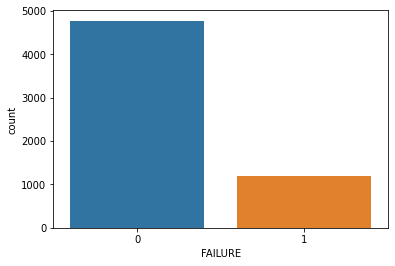

In [31]:
sns.countplot(x = 'FAILURE', data=df)
 

# 5.  Create Input and Output Data

In [32]:

y = df.iloc[:,1]
X = df.iloc[:,2:] 

 

 
# print(y.head())
# print(X.head())

 

# 6.  Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

count = y_test.value_counts()
print(count)

X_train


0    1549
1     418
Name: FAILURE, dtype: int64


,DAILY_PRODUCTION,MONTHLY_PRODUCTION,PROD_TARGET,REASON,MONTHS_IN_OPERATION,NEGATIVE_RATING,DAYS_OUT_OF_SERVICE,MACHINE_AGE,SENSOR_INQUIRIES,NUM_SENSORS,SENSOR_RATIO,INDUSTRY
5046,26800,18459.0000,53907.0,CarProd,0.000000,0.00000,0.000000,200.417027,0.000000,6.000000,71.512111,Other
2639,15100,101378.0000,143229.0,TruckPr,12.000000,0.00000,0.000000,129.537315,4.000000,21.000000,36.776213,GOVERNMENT
1047,9600,73760.8172,56900.0,TruckPr,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,14.435239,Other
4089,21400,85609.0000,108469.0,CarProd,24.000000,0.25457,1.000000,306.183662,0.000000,43.000000,39.919290,COMMERCIAL
2984,16400,21857.0000,51994.0,TruckPr,7.000000,0.00000,0.000000,201.933333,0.000000,14.000000,33.779915,GOVERNMENT
...,...,...,...,...,...,...,...,...,...,...,...,...
3633,19000,100670.0000,122581.0,CarProd,10.000000,0.00000,0.449442,81.252547,0.000000,27.000000,41.863631,COMMERCIAL
439,6700,134616.0000,155034.0,TruckPr,13.000000,1.00000,0.000000,215.422406,0.000000,19.000000,19.493872,GOVERNMENT
1626,11700,40266.0000,59097.0,CarProd,8.922268,0.00000,0.000000,74.998099,0.000000,15.000000,39.497029,Other
2667,15200,43961.0000,62171.0,CarProd,8.922268,0.00000,0.000000,124.806846,1.000000,18.000000,39.580054,Other


In [34]:
ohe = OneHotEncoder(sparse = False, handle_unknown="ignore")
enc =  ohe.fit_transform(X_train[class_inputs])

X_train[ohe.get_feature_names(class_inputs)] = pd.DataFrame(enc, index=X_train.index)
X_train.drop(class_inputs,1,inplace=True)
#print(X_train.head())

enc2 =  ohe.fit_transform(X_test[class_inputs])
X_test[ohe.get_feature_names(class_inputs)] = pd.DataFrame(enc2, index=X_test.index)
X_test.drop(class_inputs,1,inplace=True)
#print(X_test.head())
 
pickle.dump(ohe, open(project_dir+"/machine_pytorch_encoder.pickle", 'wb'))

/sasinside/miniconda3/envs/frogpy368/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/sasinside/miniconda3/envs/frogpy368/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/sasinside/miniconda3/envs/frogpy368/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [35]:
print(X_test.head())
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#scaler = MinMaxScaler()
# fit scaler on the training dataset
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
pickle.dump(scaler, open('/sasinside/userdata/gegrab/resources/hmeq/machine_pytorch_scaler.pickle', 'wb'))

 
 

      DAILY_PRODUCTION  MONTHLY_PRODUCTION    PROD_TARGET  \
2660             15200            105328.0  113931.000000   
5603             37600             33388.0   71282.000000   
403               6500             13600.0  101776.048741   
5649             39500             68117.0  117084.000000   
903               9000             50170.0   64309.000000   

      MONTHS_IN_OPERATION  NEGATIVE_RATING  DAYS_OUT_OF_SERVICE  MACHINE_AGE  \
2660                  3.0          0.00000                  0.0   138.133504   
5603                  4.0          0.00000                  0.0   202.112568   
403                  14.0          2.00000                  5.0   115.366667   
5649                 15.0          0.00000                  0.0   198.099787   
903                   7.0          0.25457                  3.0   120.431226   

      SENSOR_INQUIRIES  NUM_SENSORS  SENSOR_RATIO  REASON_CarProd  \
2660               2.0         32.0     61.890635             0.0   
5603          

# 8.  Model Parameters

In [36]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

# 9.  Define Custom Dataloaders

In [37]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

#test_tensor = torch.Tensor(test.values)
train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train.values))
                       #torch.Float(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))
 

In [38]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=1)
 

# 10.  Define Neural Net Architecture

In [39]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 18.      
        self.layer_1 = nn.Linear(18, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
         
       
        return x
    
net = binaryClassification()

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
###################### OUTPUT ######################
cuda:0

cpu


In [41]:
model2 = binaryClassification()
model2.to(device)
print(model2)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model2.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=18, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


# 11. Train the model

In [42]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [43]:
model2.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model2(X_batch)
      
        gene = torch.sigmoid(y_pred) 
        #gene = y_pred
        px = pd.DataFrame(gene).astype("float")
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.59784 | Acc: 70.714
Epoch 002: | Loss: 0.46721 | Acc: 82.206
Epoch 003: | Loss: 0.37997 | Acc: 85.937
Epoch 004: | Loss: 0.32937 | Acc: 87.333
Epoch 005: | Loss: 0.29881 | Acc: 88.317
Epoch 006: | Loss: 0.27866 | Acc: 88.651
Epoch 007: | Loss: 0.26289 | Acc: 89.619
Epoch 008: | Loss: 0.24826 | Acc: 90.730
Epoch 009: | Loss: 0.23073 | Acc: 91.048
Epoch 010: | Loss: 0.21392 | Acc: 92.032
Epoch 011: | Loss: 0.20659 | Acc: 92.349
Epoch 012: | Loss: 0.19579 | Acc: 92.667
Epoch 013: | Loss: 0.18536 | Acc: 93.381
Epoch 014: | Loss: 0.17663 | Acc: 93.254
Epoch 015: | Loss: 0.16668 | Acc: 93.619
Epoch 016: | Loss: 0.15828 | Acc: 94.492
Epoch 017: | Loss: 0.14519 | Acc: 94.952
Epoch 018: | Loss: 0.14651 | Acc: 94.968
Epoch 019: | Loss: 0.13230 | Acc: 95.159
Epoch 020: | Loss: 0.12146 | Acc: 96.016
Epoch 021: | Loss: 0.11442 | Acc: 96.238
Epoch 022: | Loss: 0.11445 | Acc: 96.063
Epoch 023: | Loss: 0.11388 | Acc: 95.571
Epoch 024: | Loss: 0.10448 | Acc: 96.286
Epoch 025: | Los

# 12.  Test the model

In [44]:
y_pred_list = []
gene_list =[]
y_test_pred_list= [] 
input_list = []

model2.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model2(X_batch)
        input = X_batch
        gene = model2(X_batch)   
        y_test_pred = torch.sigmoid(y_test_pred)
        gene = torch.sigmoid(gene) 
        y_pred_tag = torch.round(y_test_pred)
        
        y_pred_list.append(y_pred_tag.cpu().numpy())
        gene_list.append(gene.cpu().numpy())
        y_test_pred_list.append(y_test_pred.cpu().numpy())
        input_list.append(input.cpu().numpy())

 

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]


gene_list = [a.squeeze().tolist() for a in gene_list]
                          
input_list =[a.squeeze().tolist() for a in input_list]                  
    


#print(input_list[0])
#print(gene[:10])
 
print(y_test_pred_list[:5])
 
 
 

[array([[1.]], dtype=float32), array([[8.715898e-05]], dtype=float32), array([[1.]], dtype=float32), array([[6.0061634e-06]], dtype=float32), array([[0.00096405]], dtype=float32)]


# 13.  Confusion Matrix

In [45]:
confusion_matrix(y_test, y_pred_list)

array([[1531,   18],
       [ 168,  250]])

# 14.  Classification Report

In [46]:
print(classification_report(y_test, y_pred_list))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1549
           1       0.93      0.60      0.73       418

    accuracy                           0.91      1967
   macro avg       0.92      0.79      0.84      1967
weighted avg       0.91      0.91      0.90      1967



# 15.  Save and Load the Model

In [47]:
project_dir = '/sasinside/userdata/gegrab/resources/hmeq'
torch.save(model2.state_dict(), project_dir +'/'+ 'MACHINE_PyTorch_Classifier.pt')
model3 = binaryClassification()
model3.load_state_dict(torch.load(project_dir + '/' + 'MACHINE_PyTorch_Classifier.pt'))
model3.eval()

scaler2 = pickle.load(open(project_dir + '/' + 'machine_pytorch_scaler.pickle', 'rb'))

#inputMatrix = scaler2.transform(X_test)
#already scaled!!!
inputMatrix = X_test

X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 


with torch.no_grad():
    predict_proba =model3(X_test_var)
    predict_proba = torch.sigmoid(predict_proba)   
    predict_proba = pd.DataFrame(predict_proba).astype("float")
    
    
print(predict_proba[:5])

          0
0  1.000000
1  0.000087
2  1.000000
3  0.000006
4  0.000964


In [48]:
#pt vs pickle??

project_dir = '/sasinside/userdata/gegrab/resources/hmeq'
torch.save(model2.state_dict(), project_dir +'/'+ 'MACHINE_PyTorch_Classifier.pt')
model3 = binaryClassification()
model3.load_state_dict(torch.load(project_dir + '/' + 'MACHINE_PyTorch_Classifier.pt'))
model3.eval()

#original method
torch.save(model2, project_dir +'/'+ 'MACHINE_PyTorch_Classifier_orig.pt')
model4=torch.load(project_dir +'/' + 'MACHINE_PyTorch_Classifier_orig.pt')

scaler2 = pickle.load(open(project_dir + '/' + 'machine_pytorch_scaler.pickle', 'rb'))


modelx =  binaryClassification()
modelx.load_state_dict(torch.load("/sasinside/userdata/gegrab/resources/hmeq/MACHINE_PyTorch_Classifier.pt"))
modelx.eval()
    

#inputMatrix = scaler2.transform(X_test)
#already scaled!!!
inputMatrix = X_test

X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 


with torch.no_grad():
    predict_proba =model3(X_test_var)
    predict_proba = torch.sigmoid(predict_proba)   
    predict_proba = pd.DataFrame(predict_proba).astype("float")
    
    
print(predict_proba[:5])

with torch.no_grad():
    predict_proba =model4(X_test_var)
    predict_proba = torch.sigmoid(predict_proba)   
    predict_proba = pd.DataFrame(predict_proba).astype("float")
    
    
print(predict_proba[:5])
 
 

          0
0  1.000000
1  0.000087
2  1.000000
3  0.000006
4  0.000964
          0
0  1.000000
1  0.000087
2  1.000000
3  0.000006
4  0.000964


In [49]:
input_params = ''
for col in machine.columns:
    input_params += col
    if col != machine.columns[-1]:
        input_params += ', '

input_cols = ''
for col in machine.columns:
    input_cols += "\"" + col + "\""
    if col != machine.columns[-1]:
        input_cols += ', '


print(input_cols)
print("")
print(input_params)


"MACHINE_ID", "DAILY_PRODUCTION", "MONTHLY_PRODUCTION", "PROD_TARGET", "REASON", "MONTHS_IN_OPERATION", "NEGATIVE_RATING", "DAYS_OUT_OF_SERVICE", "MACHINE_AGE", "SENSOR_INQUIRIES", "NUM_SENSORS", "SENSOR_RATIO", "INDUSTRY"

MACHINE_ID, DAILY_PRODUCTION, MONTHLY_PRODUCTION, PROD_TARGET, REASON, MONTHS_IN_OPERATION, NEGATIVE_RATING, DAYS_OUT_OF_SERVICE, MACHINE_AGE, SENSOR_INQUIRIES, NUM_SENSORS, SENSOR_RATIO, INDUSTRY


In [50]:
# Export the model
import onnx
torch.onnx.export(model3,               # model being run
                  X_test_var[0:2],                         # model input (or a tuple for multiple inputs)
                  "/sasinside/userdata/gegrab/resources/hmeq/MACHINE_PyTorch_ONNX.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to            
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'] # the model's output names
                 )

In [51]:
import onnxruntime as rt
ort_session = rt.InferenceSession("/sasinside/userdata/gegrab/resources/hmeq/MACHINE_PyTorch_ONNX.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(X_test_var[0:2])} 
ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))
     
     
predict_proba = torch.sigmoid(ort_outs)   
predict_proba[0], X_test_var.shape


(tensor([[1.0000e+00],
         [8.7159e-05]]),
 torch.Size([1967, 18]))

In [52]:
def execute(MACHINE_ID, DAILY_PRODUCTION, MONTHLY_PRODUCTION, PROD_TARGET, REASON, MONTHS_IN_OPERATION, NEGATIVE_RATING, DAYS_OUT_OF_SERVICE, MACHINE_AGE, SENSOR_INQUIRIES, NUM_SENSORS, SENSOR_RATIO, INDUSTRY):
    "Output: P_FAILURE"
        
    #global pred_onnx
    
    import onnxruntime as rt
    import pickle
    import numpy as np
    import pandas as pd
    
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import Dataset, DataLoader
    from torch.autograd import Variable
     
    
    inputArray = pd.DataFrame([[MACHINE_ID, DAILY_PRODUCTION, MONTHLY_PRODUCTION, PROD_TARGET, REASON, MONTHS_IN_OPERATION, NEGATIVE_RATING, DAYS_OUT_OF_SERVICE, MACHINE_AGE, SENSOR_INQUIRIES, NUM_SENSORS, SENSOR_RATIO, INDUSTRY]],
                              columns = ["MACHINE_ID", "DAILY_PRODUCTION", "MONTHLY_PRODUCTION", "PROD_TARGET", "REASON", "MONTHS_IN_OPERATION", "NEGATIVE_RATING", "DAYS_OUT_OF_SERVICE", "MACHINE_AGE", "SENSOR_INQUIRIES", "NUM_SENSORS", "SENSOR_RATIO", "INDUSTRY"]
                               )
    
    dummy=inputArray
     
    inputArray = pd.concat([inputArray,dummy], sort=False)
    
      
    def preprocessing(df, ohe_loc = None):

        categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    
        with open(ohe_loc, "rb") as ohe_file:
            ohe = pickle.load(ohe_file) 
        
        enc = ohe.transform(df[categorical_cols])
    
        df[ohe.get_feature_names(categorical_cols).tolist()] = pd.DataFrame(enc, index=df.index)

        df.drop(categorical_cols,1,inplace=True)

        df.dropna(inplace=True)
    
        return df

    
    inputArray.fillna(pickle.load(open('/sasinside/userdata/gegrab/resources/hmeq/machine_impute.pickle', 'rb')), inplace=True)
    inputArray.REASON.replace(np.nan,'TruckPr',regex = True, inplace=True)
    inputArray.INDUSTRY.replace(np.nan,'Other',regex = True, inplace=True)

    inputArray.drop(['MACHINE_ID'], axis=1, inplace=True)
    
    
    inputArray = preprocessing(inputArray, "/sasinside/userdata/gegrab/resources/hmeq/machine_encoder.pickle")
    
     
    
    scaler2 = pickle.load(open("/sasinside/userdata/gegrab/resources/hmeq/machine_pytorch_scaler.pickle", 'rb'))
    
    inputMatrix = scaler2.transform(inputArray)
    
     
    
    #X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 
    X_test_var = torch.FloatTensor(inputMatrix)
     


    ort_session = rt.InferenceSession("/sasinside/userdata/gegrab/resources/hmeq/MACHINE_PyTorch_ONNX.onnx")

    def to_numpy(tensor):
        return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

    ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(X_test_var)} 
    ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))
     
     
    predict_proba = torch.sigmoid(ort_outs)   
    #predict_proba = predict_proba.numpy()
    

    P_FAILURE = float(predict_proba[0][0])
     
     
    return (P_FAILURE)

 

In [53]:
 
import pandas as pd
testdf= pd.read_csv('Data_orig/MACHINE_test2.csv')  
 
for i in range(5):
    print(execute(**testdf.iloc[i]))

0.9989355206489563
0.9955537915229797
0.9995980858802795
0.7407719492912292
0.0004835129948332906


/sasinside/miniconda3/envs/frogpy368/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.0.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/sasinside/miniconda3/envs/frogpy368/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.0.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/sasinside/miniconda3/envs/frogpy368/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.0.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/sasinside/miniconda3/envs/frogpy368/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from v

In [54]:
score_code = """
def execute(MACHINE_ID, DAILY_PRODUCTION, MONTHLY_PRODUCTION, PROD_TARGET, REASON, MONTHS_IN_OPERATION, NEGATIVE_RATING, DAYS_OUT_OF_SERVICE, MACHINE_AGE, SENSOR_INQUIRIES, NUM_SENSORS, SENSOR_RATIO, INDUSTRY):
    "Output: P_FAILURE"
        
    #global pred_onnx
    
    import onnxruntime as rt
    import pickle
    import numpy as np
    import pandas as pd
    
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import Dataset, DataLoader
    from torch.autograd import Variable
     
    
    inputArray = pd.DataFrame([[MACHINE_ID, DAILY_PRODUCTION, MONTHLY_PRODUCTION, PROD_TARGET, REASON, MONTHS_IN_OPERATION, NEGATIVE_RATING, DAYS_OUT_OF_SERVICE, MACHINE_AGE, SENSOR_INQUIRIES, NUM_SENSORS, SENSOR_RATIO, INDUSTRY]],
                              columns = ["MACHINE_ID", "DAILY_PRODUCTION", "MONTHLY_PRODUCTION", "PROD_TARGET", "REASON", "MONTHS_IN_OPERATION", "NEGATIVE_RATING", "DAYS_OUT_OF_SERVICE", "MACHINE_AGE", "SENSOR_INQUIRIES", "NUM_SENSORS", "SENSOR_RATIO", "INDUSTRY"]
                               )
    
    dummy=inputArray
     
    inputArray = pd.concat([inputArray,dummy], sort=False)
    
      
    def preprocessing(df, ohe_loc = None):

        categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    
        with open(ohe_loc, "rb") as ohe_file:
            ohe = pickle.load(ohe_file) 
        
        enc = ohe.transform(df[categorical_cols])
    
        df[ohe.get_feature_names(categorical_cols).tolist()] = pd.DataFrame(enc, index=df.index)

        df.drop(categorical_cols,1,inplace=True)

        df.dropna(inplace=True)
    
        return df

    
    inputArray.fillna(pickle.load(open('/sasinside/userdata/gegrab/resources/hmeq/machine_impute.pickle', 'rb')), inplace=True)
    inputArray.REASON.replace(np.nan,'TruckPr',regex = True, inplace=True)
    inputArray.INDUSTRY.replace(np.nan,'Other',regex = True, inplace=True)

    inputArray.drop(['MACHINE_ID'], axis=1, inplace=True)
    
    
    inputArray = preprocessing(inputArray, "/sasinside/userdata/gegrab/resources/hmeq/machine_encoder.pickle")
    
     
    
    scaler2 = pickle.load(open("/sasinside/userdata/gegrab/resources/hmeq/machine_pytorch_scaler.pickle", 'rb'))
    
    inputMatrix = scaler2.transform(inputArray)
    
     
    
    #X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 
    X_test_var = torch.FloatTensor(inputMatrix)
     


    ort_session = rt.InferenceSession("/sasinside/userdata/gegrab/resources/hmeq/MACHINE_PyTorch_ONNX.onnx")

    def to_numpy(tensor):
        return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

    ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(X_test_var)} 
    ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))
     
     
    predict_proba = torch.sigmoid(ort_outs)   
    #predict_proba = predict_proba.numpy()
    

    P_FAILURE = float(predict_proba[0][0])
     
     
    return (P_FAILURE)"""


f = open('Data_orig/MACHINE_Pytorch_ONNX.py',"w+")
f.write(score_code)
f.close()


